In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
import os
from core import PACKAGE_ROOT
import warnings
import cmd
import textwrap
warnings.filterwarnings('ignore')

In [4]:
#Location of data files
train_data_loc = PACKAGE_ROOT / 'data/train.csv'
test_data_loc = PACKAGE_ROOT / 'data/test.csv'

#reading data files
train_data = pd.read_csv(train_data_loc)
test_data = pd.read_csv(test_data_loc)

In [15]:
print(train_data.head(2))
print('-'*50)
print('- number of records in the dataset :', len(train_data))
print('- Number of unique customers :', train_data.CustomerId.nunique())

   id  CustomerId         Surname  CreditScore Geography Gender   Age  Tenure  \
0   0    15674932  Okwudilichukwu          668    France   Male  33.0       3   
1   1    15749177   Okwudiliolisa          627    France   Male  33.0       1   

   Balance  NumOfProducts  HasCrCard  IsActiveMember  EstimatedSalary  Exited  
0      0.0              2        1.0             0.0        181449.97       0  
1      0.0              2        1.0             1.0         49503.50       0  
--------------------------------------------------
- number of records in the dataset : 165034
- Number of unique customers : 23221


In [16]:
#checking for null values
train_data.isnull().sum()

id                 0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [17]:
def plot_distribution(series, plt_title, figsize, bins=14):
  plt.figure(figsize = figsize)
  plt.title(plt_title)
  series = np.array(series, dtype=int)
  sn.distplot(series, hist=True, bins=bins, kde=True, kde_kws={'bw':.2})
  plt.axvline(series.mean(),color='midnightblue',label='Mean')    
  plt.axvline(np.median(series),color='blue',label='Median')
  plt.axvline(series.max(),color='indigo',label='Max')
  plt.axvline(series.min(),color='crimson',label='Min')
  plt.axvline(np.quantile(series, 0.25),color='red',label='First quartile - 25%')
  plt.axvline(np.quantile(series, 0.75),color='orangered',label='Third quartile - 75%')
  plt.legend()
  plt.show()

##### Analysing Credit Score

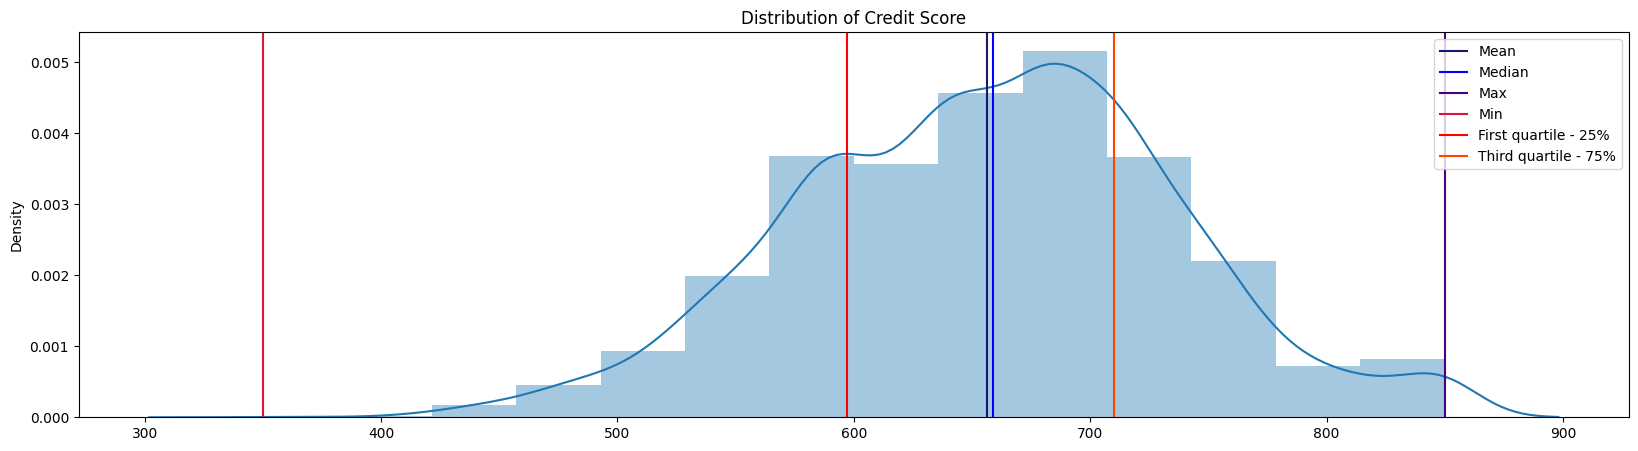

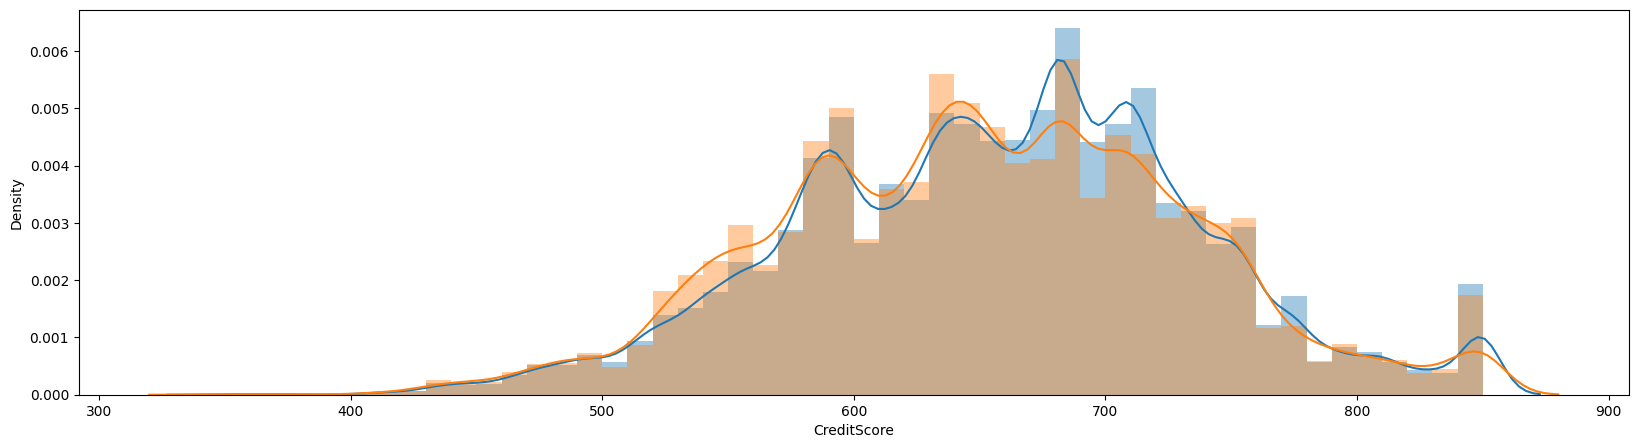

In [25]:
plot_distribution(train_data.CreditScore, plt_title='Distribution of Credit Score', figsize=(20,5))
plt.figure(figsize=(20,5))
sn.distplot(train_data.CreditScore[train_data.Exited == 0])
sn.distplot(train_data.CreditScore[train_data.Exited == 1])
plt.show()

Observations:
* Credit score varies from 300 to 900.
* Data is skewed towards left.
* Mean and median are very near to each other even though there is skew
* Not much difference in credit score distribution of churned and non churned users